In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data source: https://www.coursera.org/learn/machine-learning/home/welcome

# Load data 

In [17]:
# we are under root directory 
data_df = pd.read_csv('lr_gradient_descent/dataset/ex1data1.txt',header=None, names=['population', 'profit'])

In [18]:
data_df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


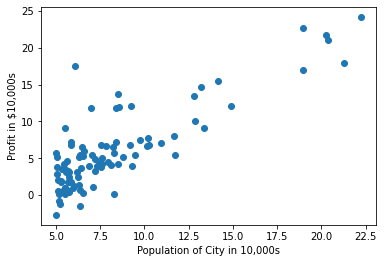

In [23]:
plt.scatter(data_df['population'], data_df['profit'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Normalize features

In [28]:
# feature normalization
x = data_df['population'].to_numpy()
y = data_df['profit'].to_numpy()

x = (x - x.mean())/(x.max() - x.min())
y = (y - x.mean())/(y.max() - y.min())

In [29]:
# shape of x and y
print(x.shape, y.shape)

(97,) (97,)


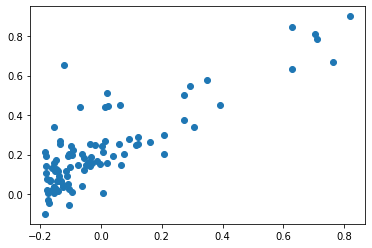

In [30]:
plt.scatter(x, y)
plt.show()

# Gradient Descent

We will use a linear model with one variable to fit the data: 

$y = \theta_0 + \theta_1x_1$

where $x_1$ is Population of City and $y$ is Profit. 

### Design matrix

Adding extra 1 to x vector so it becomes m x 2 matrix

In [51]:
X = np.array([[1, xx] for xx in x])

In [53]:
X[:3]

array([[ 1.        , -0.11933442],
       [ 1.        , -0.153242  ],
       [ 1.        ,  0.02088949]])

In [52]:
X.shape

(97, 2)

In [61]:
sum(np.array([1, 2]))

3

In [73]:
# reshape y 
y = y.reshape(-1, 1)

In [74]:
y.shape

(97, 1)

## implement 

In [135]:
def compute_cost_function(X, y, theta):
    h = compute_hypothesis(X, theta)
    j = ((h - y)**2).mean()/2
    return j

def compute_derivative(X, y, theta):
    # fundction to calculate partial derivative of J with respect to theta
    delta_theta0 = 1/m * ((compute_hypothesis(X, theta)-y)*X[:, 0].reshape(-1, 1)).mean()
    delta_theta1 = 1/m * ((compute_hypothesis(X, theta)-y)*X[:, 1].reshape(-1, 1)).mean()
    return np.array([[delta_theta0], [delta_theta1]])

def compute_hypothesis(X, theta):
    # function to calculate h(x) given x and theta
    h = np.matmul(X, theta)
    return h

# initialize params 
learning_rate = 0.1
theta = np.array([random.random() for r in range(2)]).reshape(-1, 1)
print('initial theta:')
print(theta)
print()

j_list = []
for i in range(10): 
    # compute 
    print(f"iteration: {i}")
    
    # update theta 
    delta = compute_derivative(X, y, theta)
    print('delta:')
    print(delta)
    theta -= learning_rate * delta
    print("theta:")
    print(theta)
    print()
    
    # check J 
    j = compute_cost_function(X, y, theta)
    j_list.append(j)
    print("cost function J:", j)

initial theta:
[[0.798591 ]
 [0.3371763]]

iteration: 0
delta:
[[ 0.00598905]
 [-0.00022098]]
theta:
[[0.7979921]
 [0.3371984]]

cost function J: 0.17918905717233014
iteration: 1
delta:
[[ 0.00598288]
 [-0.00022096]]
theta:
[[0.79739381]
 [0.33722049]]

cost function J: 0.17884155304694477
iteration: 2
delta:
[[ 0.00597671]
 [-0.00022095]]
theta:
[[0.79679614]
 [0.33724259]]

cost function J: 0.17849476412865933
iteration: 3
delta:
[[ 0.00597055]
 [-0.00022094]]
theta:
[[0.79619908]
 [0.33726468]]

cost function J: 0.1781486889436761
iteration: 4
delta:
[[ 0.00596439]
 [-0.00022093]]
theta:
[[0.79560264]
 [0.33728678]]

cost function J: 0.17780332602123455
iteration: 5
delta:
[[ 0.00595824]
 [-0.00022092]]
theta:
[[0.79500682]
 [0.33730887]]

cost function J: 0.17745867389360523
iteration: 6
delta:
[[ 0.0059521 ]
 [-0.00022091]]
theta:
[[0.79441161]
 [0.33733096]]

cost function J: 0.17711473109608325
iteration: 7
delta:
[[ 0.00594596]
 [-0.0002209 ]]
theta:
[[0.79381701]
 [0.33735305]

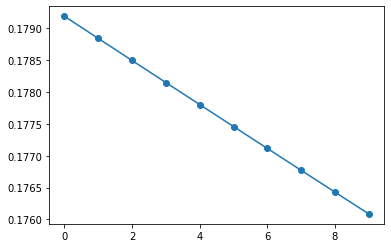

In [136]:
plt.plot(j_list, 'o-')
plt.show()